In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
import util

In [2]:
ROOT_FOLDER = util.ROOT_FOLDER

filenames, datamap = util.initial_setup()

In [16]:
################
#   CLASS MAP  
#   ---------  
# 0: Other     
# 1: Crater    
# 2: Dark Dune 
# 3: Slope Streak
# 4: Bright Dune
# 5: Impact Ejecta
# 6: Swiss Cheese
# 7: Spider
################

In [15]:
def get_image_data(path, debug=False, reduction=None, shrink_dim=None):
    # Reduction variable: (rows to cut off, columns to cutoff)
    # Shrink Variables: (rows, columns) ---> See Data Size Handling
        
    def shrink(data, rows, cols):
        return data.reshape(rows, int(data.shape[0]/rows), cols, int(data.shape[1]/cols)).sum(axis=1).sum(axis=2).astype("int16")
    
    # load the image
    image = Image.open(path)
    if image.mode == "RGBA":
        orig_shape = image.shape
        image = image.convert('RGB')
        if debug:
            print("original shape:", orig_shape)
            print("new shape:", image.shape)
        

    # convert image to numpy array
    # If reducing we will subset
    
    if reduction is None:
        data = np.asarray(image)
    else:
        data = np.asarray(image)[:-reduction[0],:-reduction[1]]

    if shrink_dim is not None:
        # For 225x225 these dims work nicely (smaller is less detail): # 25, 45, 75
        data = shrink(data, shrink_dim[0], shrink_dim[1]
            
    if debug:
        print(type(data))
        # summarize shape
        print(data.shape)
    
    return data
    
def show_image(compressed_image):
    fig, ax0 = plt.subplots()

    ax0.imshow(compressed_image)
    plt.show()
    
def get_image_example(data_map, class_type, loc=0, debug=False, root_path=ROOT_FOLDER, reduction=None):
    # inputting -1 for loc will produce a random image
    if loc == -1:
        loc = np.random.randint(0,datamap[(datamap.PhotoIncluded==1) & (datamap.Class==class_type)]['File Name'].shape[0])
    
    example_image = datamap[(datamap.PhotoIncluded==1) & (datamap.Class==class_type)]['File Name'].iloc[loc]
    
    example_image = os.path.join(root_path,example_image)
    
    show_image(get_image_data(example_image, debug, reduction))
    return example_image

<class 'numpy.ndarray'>
(225, 225)


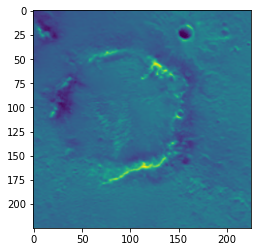

<class 'numpy.ndarray'>
(227, 227)


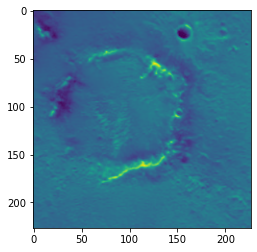

'C:\\Users\\cdcro\\Documents\\GT\\Project\\Mars\\hirise-map-proj-v3_2\\hirise-map-proj-v3_2\\map-proj-v3_2\\ESP_034590_1795_RED-0125-r270.jpg'

In [17]:
get_image_example(datamap, 1, loc=9, debug=True, reduction=(2,2))
get_image_example(datamap, 1, loc=9, debug=True)

#######################
CLASS 0 - Other
#######################
example 1 (class 0 - Other)


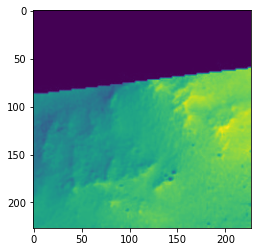

example 2 (class 0 - Other)


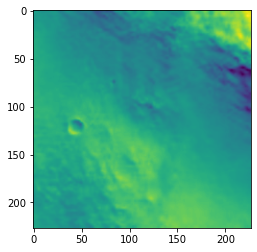

example 3 (class 0 - Other)


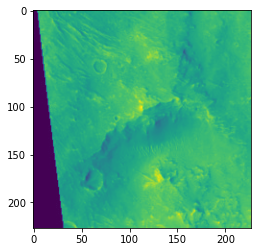

example 4 (class 0 - Other)


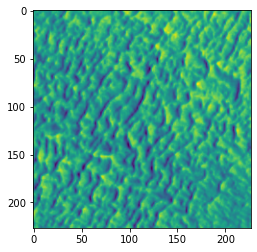

example 5 (class 0 - Other)


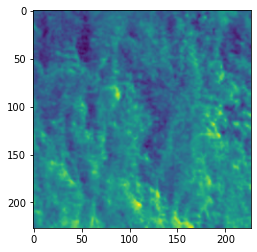




#######################
CLASS 1 - Crate
#######################
example 1 (class 1 - Crate)


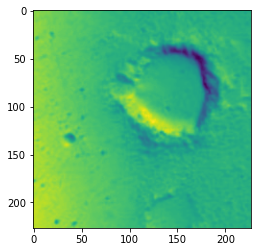

example 2 (class 1 - Crate)


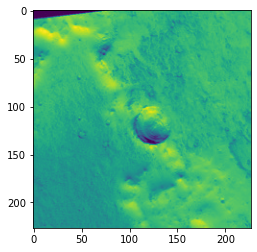

example 3 (class 1 - Crate)


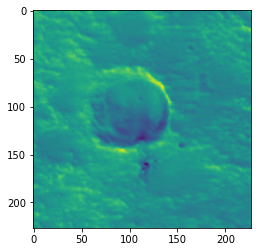

example 4 (class 1 - Crate)


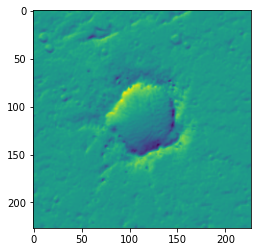

example 5 (class 1 - Crate)


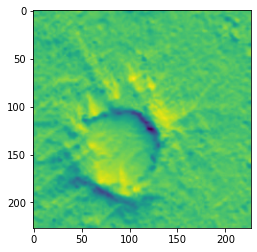




#######################
CLASS 2 - Dark Dune
#######################
example 1 (class 2 - Dark Dune)


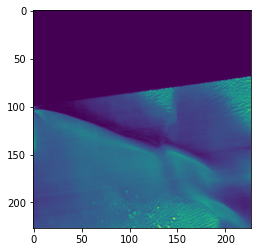

example 2 (class 2 - Dark Dune)


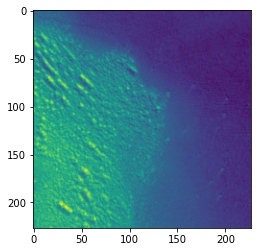

example 3 (class 2 - Dark Dune)


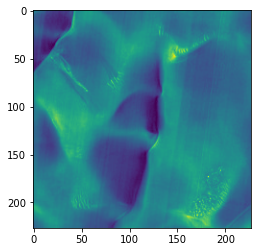

example 4 (class 2 - Dark Dune)


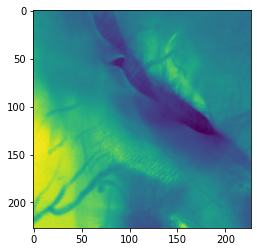

example 5 (class 2 - Dark Dune)


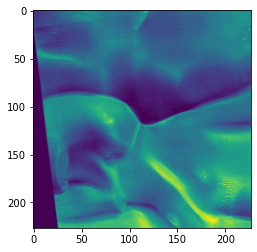




#######################
CLASS 3 - Slope Streak
#######################
example 1 (class 3 - Slope Streak)


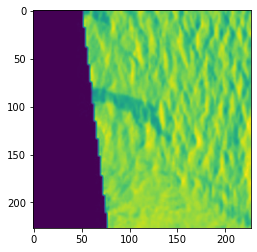

example 2 (class 3 - Slope Streak)


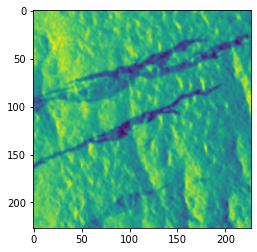

example 3 (class 3 - Slope Streak)


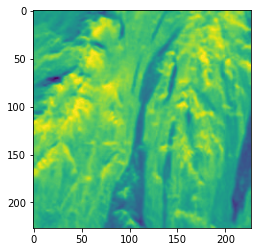

example 4 (class 3 - Slope Streak)


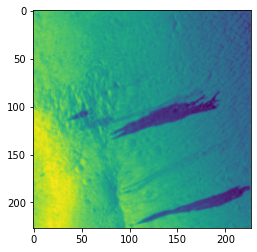

example 5 (class 3 - Slope Streak)


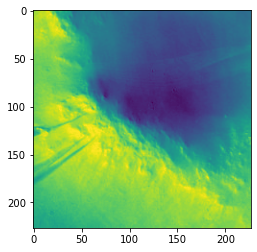




#######################
CLASS 4 - Bright Dune
#######################
example 1 (class 4 - Bright Dune)


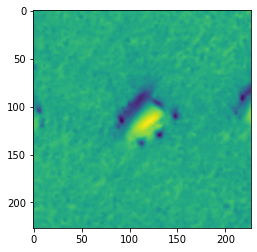

example 2 (class 4 - Bright Dune)


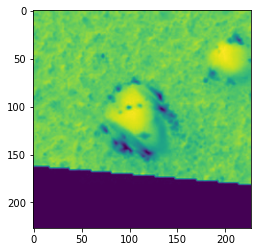

example 3 (class 4 - Bright Dune)


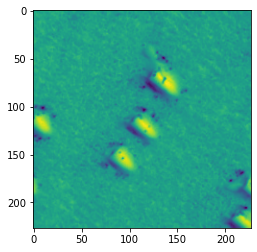

example 4 (class 4 - Bright Dune)


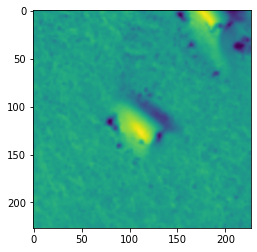

example 5 (class 4 - Bright Dune)


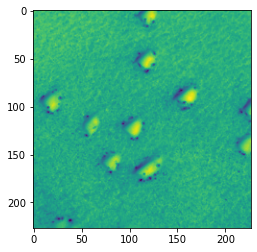




#######################
CLASS 5 - Impact Ejecta
#######################
example 1 (class 5 - Impact Ejecta)


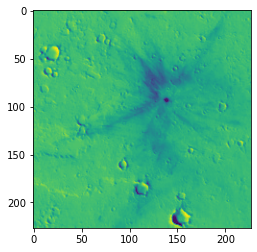

example 2 (class 5 - Impact Ejecta)


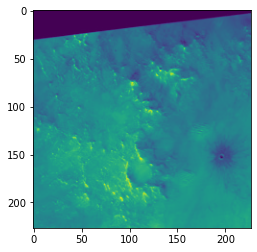

example 3 (class 5 - Impact Ejecta)


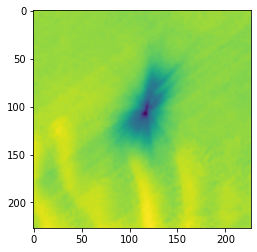

example 4 (class 5 - Impact Ejecta)


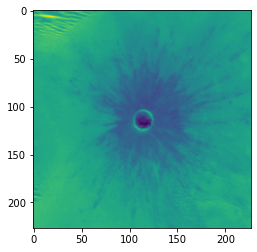

example 5 (class 5 - Impact Ejecta)


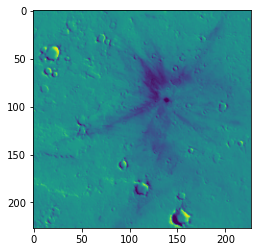




#######################
CLASS 6 - Swiss Cheese
#######################
example 1 (class 6 - Swiss Cheese)


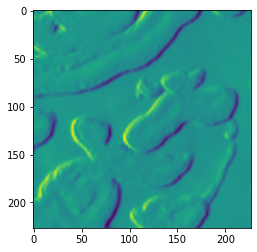

example 2 (class 6 - Swiss Cheese)


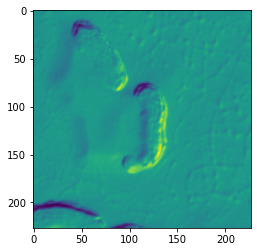

example 3 (class 6 - Swiss Cheese)


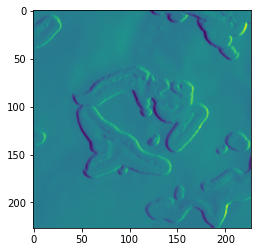

example 4 (class 6 - Swiss Cheese)


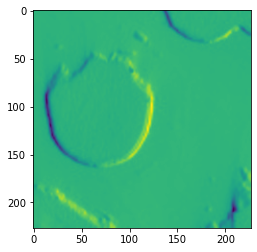

example 5 (class 6 - Swiss Cheese)


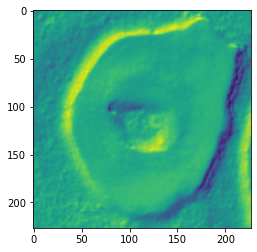

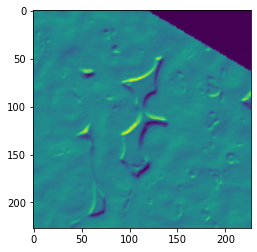

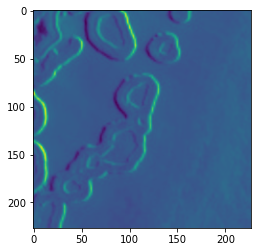

'C:\\Users\\cdcro\\Documents\\GT\\Project\\Mars\\hirise-map-proj-v3_2\\hirise-map-proj-v3_2\\map-proj-v3_2\\PSP_002804_0930_RED-0003-r90.jpg'

In [18]:
################
#   CLASS MAP  
#   ---------  
# 0: Other     
# 1: Crater    
# 2: Dark Dune 
# 3: Slope Streak
# 4: Bright Dune
# 5: Impact Ejecta
# 6: Swiss Cheese
# 7: Spider
################

class_map = {0: "Other", 1: "Crate", 2: "Dark Dune", 3: "Slope Streak", 4: "Bright Dune", 5: "Impact Ejecta", 6: "Swiss Cheese", 7: "Spider"}

for i in range(7):
    print("#######################")
    print(f"CLASS {i} - {class_map[i]}")
    print("#######################")
    for j in range(5):
        print(f"example {j+1} (class {i} - {class_map[i]})")
        get_image_example(datamap, i, loc=-1)
        
    
    print("\n\n")
        

get_image_example(datamap, 6, -1)
get_image_example(datamap, 6, -1)